# Notes on Sparse Bayesian Learning: ARD regression and Relevance Vector machine

### Variable Selection

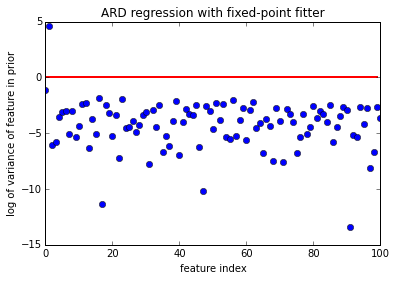

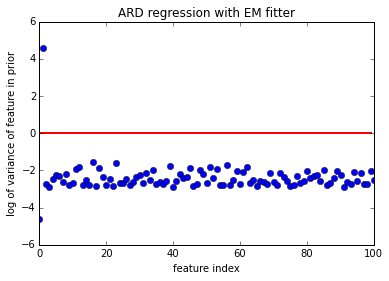

number of variables selected wiht EM fitter 1
number of variables selected wiht fixed-point fitter 1


In [1]:
import numpy as np
from rvm import SparseBayesianLearner
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


# generate training & test data
np.random.seed(0)
X                             = np.random.random([500,100])
X[:,0]                        = np.linspace(start = 0,stop = 10, num = 500)
Y                             = 10*X[:,0]  + np.random.normal(0,1,500)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

# fit data with EM & fixed-point
ard_regression_em             = SparseBayesianLearner(learn_type = "regression",
                                                      method = "EM",
                                                      alpha_max = 1)
ard_regression_fp             = SparseBayesianLearner(learn_type = "regression",
                                                      method = "fixed-point",
                                                      alpha_max = 1)
ard_regression_em.fit(X_train,Y_train)
ard_regression_fp.fit(X_train,Y_train)

# plot variance of parameters in prior
fp = plt.plot(np.log(1./ard_regression_fp.diagA),"bo")
plt.xlabel("feature index")
plt.ylabel("log of variance of feature in prior")
plt.title("ARD regression with fixed-point fitter")
plt.plot(np.zeros(100),"r-", linewidth = 2)
plt.show()

em = plt.plot(np.log(1./ard_regression_em.diagA),"bo")
plt.xlabel("feature index")
plt.ylabel("log of variance of feature in prior")
plt.title("ARD regression with EM fitter")
plt.plot(np.zeros(100),"r-", linewidth = 2)
plt.show()

print "number of variables selected wiht EM fitter " + str(np.sum(ard_regression_em.active))
print "number of variables selected wiht fixed-point fitter " + str(np.sum(ard_regression_fp.active))


### EM vs Fixed-Point algorithms for fitting RVM

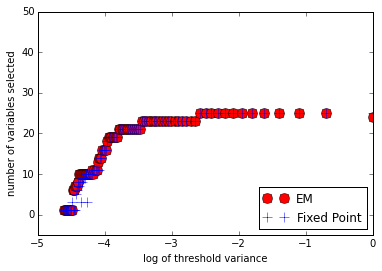

In [3]:
em_vars_selected = []
fp_vars_selected = []
for alpha_max_i in xrange(1,100):
     ard_regression_em_i  = SparseBayesianLearner( method = "EM",alpha_max = alpha_max_i)
     ard_regression_fp_i  = SparseBayesianLearner(method = "fixed-point",alpha_max = alpha_max_i)
     ard_regression_em_i.fit(X_train, Y_train, )
     ard_regression_fp_i.fit(X_train, Y_train, )
     em_vars_selected.append(np.sum(ard_regression_em_i.active))
     fp_vars_selected.append(np.sum(ard_regression_fp_i.active))
        
plt.plot(np.log(sorted(1./np.linspace(1,100,99))), em_vars_selected,"ro", 
                                                                    markersize = 10, 
                                                                    label = "EM")
plt.plot(np.log(sorted(1./np.linspace(1,100,99))), fp_vars_selected,"b+", 
                                                                    markersize = 10, 
                                                                    label = "Fixed Point")
plt.ylim((-5,50))
plt.xlabel("log of threshold variance")
plt.ylabel("number of variables selected")
plt.legend(loc = 4)
plt.show()

### Predictions

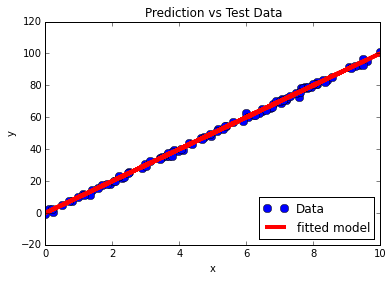

In [4]:
# mean of predictive distribution
mu   = ard_regression_fp.predict(X_test)

plt.plot(X_test[:,0],Y_test,"bo", markersize = 8, label = "Data")
plt.plot(X_test[:,0],mu    ,"r-", linewidth = 4, label = "fitted model")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)
plt.title("Prediction vs Test Data")
plt.show()

## Relevance Vector Machine